In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.datasets import mnist

Text(0.5, 1.0, '7')

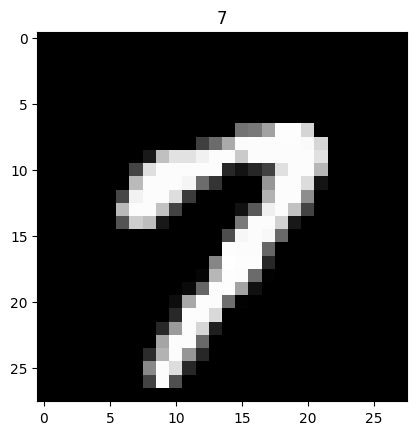

In [2]:
#Obtaining data and automatically dividing between training and testing
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Visualizing the training image
plt.imshow(x_train[15], cmap = 'gray')
plt.title(y_train[15])

In [3]:
# Dimension change, originally at 28x28 and we need 784 = 28*28
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [4]:
# Transformation of data in floating point format 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalization
x_train = x_train/255
x_test = x_test/255

In [5]:
# Transformation to dummy format (10 classes)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [6]:
# Neural network structure: 784 - 64 - 64 - 64 - 10
#Dropout is used to reset a percentage of neurons to prevent overfitting
NN_model = Sequential()
NN_model.add(Dense(units = 64, activation = 'relu', input_dim = 784))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(units = 64, activation = 'relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(units = 64, activation = 'relu'))
NN_model.add(Dropout(0.2))
#Output layer, softmax probability
NN_model.add(Dense(units = 10, activation = 'softmax'))

# Neural network visualization
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [7]:
# Configuration of neural network parameters and training (using validation database)
# In the historical variable we have the history of executions (error and accuracy)
NN_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
Neural_network = NN_model.fit(x_train, y_train, epochs = 50,
                       validation_data = (x_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4420 - accuracy: 0.8651 - val_loss: 0.1504 - val_accuracy: 0.9522
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2344 - accuracy: 0.9318 - val_loss: 0.1244 - val_accuracy: 0.9630
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1930 - accuracy: 0.9439 - val_loss: 0.1341 - val_accuracy: 0.9599
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1666 - accuracy: 0.9510 - val_loss: 0.1173 - val_accuracy: 0.9661
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1527 - accuracy: 0.9554 - val_loss: 0.0967 - val_accuracy: 0.9712
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1405 - accuracy: 0.9588 - val_loss: 0.1001 - val_accuracy: 0.9702
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1300 - accuracy: 0.9614 - val_loss: 0.1018 - val_accuracy:

Text(0, 0.5, 'Accuracy')

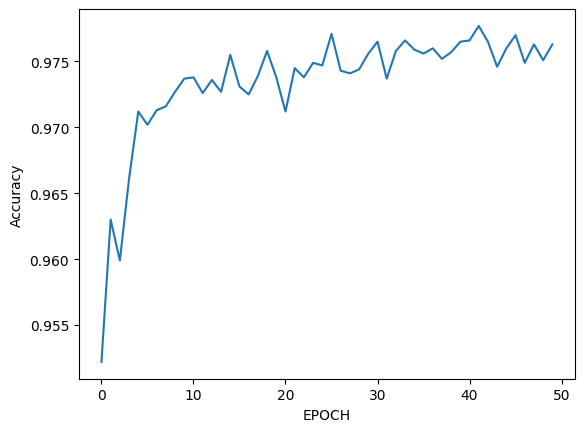

In [8]:
# Plot the accuracy of the training and validation data
Neural_network.history.keys()

plt.plot(Neural_network.history['val_accuracy'])
plt.xlabel('EPOCH')
plt.ylabel('Accuracy')

In [9]:
# Forecast to make the confusion matrix
forecast = NN_model.predict(x_test)


313/313 [==============================] - 0s 1ms/step


In [10]:
# maximum value (with the highest probability that there are 10 outputs) and 
# generation of the confusion matrix
y_test_matrix = [np.argmax(t) for t in y_test]
y_predictor_matrix = [np.argmax(t) for t in forecast]
confusion = confusion_matrix(y_test_matrix, y_predictor_matrix)
print(confusion)
ACC = accuracy_score(y_test_matrix, y_predictor_matrix)
print(f'Accuracy: {ACC*100:.1f} %')


[[ 967    0    1    0    1    1    5    1    1    3]
 [   0 1125    2    1    0    1    2    0    4    0]
 [   1    3 1008    1    3    0    2    9    5    0]
 [   0    0    5  986    0    7    0    5    5    2]
 [   1    0    1    0  958    0    6    2    1   13]
 [   3    0    1   10    1  867    4    1    2    3]
 [   5    3    0    1    6    4  937    0    2    0]
 [   0    3   14    3    0    0    0  998    2    8]
 [   6    1    5    3    3    5    2    7  937    5]
 [   2    2    0    4   10    3    0    6    2  980]]
Accuracy: 97.6 %


PREDICT THE NUMBER DEFINED AS IMAGE

In [11]:
NEW = x_train[10] # number 3
#Convert to a 1D array
NEW = np.expand_dims(NEW, axis = 0)

pred = NN_model.predict(NEW)
#maior valor
pred = [np.argmax(pred) for t in pred]
display(pred)

1/1 [==============================] - 0s 18ms/step


[3]